 Step 0: Imports

In [23]:
#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Step 1: Dataset

In [24]:
# read the data set
df=pd.read_csv('wusool_data.csv')

In [25]:
# show the 1st two rows in data set
df.head(2)

,رقم تسلسلي,الحالة,المدينة,المنطقة,مدينة العنوان الوطني,تاريخ أول رحلة,تاريخ آخر رحلة,تاريخ التسجيل
0,1,فعالة,ثول,مكة المكرمة,NaN,4/15/2021,4/16/2021,4/12/2021
1,2,فعالة,طريف,الرياض,NaN,3/2/2021,4/20/2021,3/1/2021


In [26]:
# show the informations in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123871 entries, 0 to 123870
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   رقم تسلسلي            123871 non-null  int64 
 1   الحالة                123871 non-null  object
 2   المدينة               119594 non-null  object
 3   المنطقة               121306 non-null  object
 4   مدينة العنوان الوطني  96088 non-null   object
 5   تاريخ أول رحلة        100594 non-null  object
 6   تاريخ آخر رحلة        100594 non-null  object
 7   تاريخ التسجيل         123871 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.6+ MB


Step 2: Data cleaning & prepressing 
1- column:
- rename columns to english.
- remove white space.
- check data type.
- overwriting FirstFlightDate, LastFlightDate, RegistrationDate after changing format

2- row:
- check missing date.
- fill missing date with NAN.
- check duplicate.
- replace status data columns with:( "مستبعدة" --> "InActive","مؤهلة" --> "eligible", "فعالة" --> "Active" )
- replace each region to english

In [27]:
df.columns

Index(['رقم تسلسلي', 'الحالة', 'المدينة', 'المنطقة', 'مدينة العنوان الوطني',
       'تاريخ أول رحلة', 'تاريخ آخر رحلة', 'تاريخ التسجيل'],
      dtype='object')

In [28]:
df.shape

(123871, 8)

In [29]:
# rename the columns
df= df.rename(columns={
    'رقم تسلسلي':'serial-number',
    'الحالة':'status',
    'المدينة':'city',
    'المنطقة':'region',
    'مدينة العنوان الوطني':'NAS',
    'تاريخ أول رحلة':'FirstFlightDate',
    'تاريخ آخر رحلة':'LastFlightDate',
    'تاريخ التسجيل':'RegistrationDate'})



In [30]:
df.columns

Index(['serial-number', 'status', 'city', 'region', 'NAS', 'FirstFlightDate',
       'LastFlightDate', 'RegistrationDate'],
      dtype='object')

In [31]:
#remove white space.
df.columns = df.columns.str.strip()

In [32]:
#check data type
print(df.dtypes)

serial-number        int64
status              object
city                object
region              object
NAS                 object
FirstFlightDate     object
LastFlightDate      object
RegistrationDate    object
dtype: object


In [47]:
# overwriting FirstFlightDate, LastFlightDate, RegistrationDate after changing format
df["FirstFlightDate"]= pd.to_datetime(df["FirstFlightDate"])
df["LastFlightDate"]= pd.to_datetime(df["LastFlightDate"])
df["RegistrationDate"]= pd.to_datetime(df["RegistrationDate"])

In [33]:
#check missimg date.
df.isna().sum()

serial-number           0
status                  0
city                 4277
region               2565
NAS                 27783
FirstFlightDate     23277
LastFlightDate      23277
RegistrationDate        0
dtype: int64

In [34]:
#fill missing date with 0.
df = df.fillna("NAN")
df.isna().sum()

serial-number       0
status              0
city                0
region              0
NAS                 0
FirstFlightDate     0
LastFlightDate      0
RegistrationDate    0
dtype: int64

In [35]:
#check duplicate.
df.duplicated().sum()

0

In [36]:
#replace "مستبعدة" with "InActive"
#replace "مؤهلة" with "eligible"
#replace "فعالة" with "Active"

df['status']=df["status"].replace("مستبعدة", "InActive", regex=True)
df['status']=df["status"].replace("مؤهلة", "eligible", regex=True)
df['status']=df["status"].replace("فعالة", "Active", regex=True)


In [108]:
#replace each region to english

df['region']=df["region"].replace("الباحة", "Albaha", regex=True)
df['region']=df["region"].replace("الجوف", "Aljoof", regex=True)
df['region']=df["region"].replace("الحدود الشمالية", "Northern borders", regex=True)
df['region']=df["region"].replace("الرياض", "Riyadh", regex=True)
df['region']=df["region"].replace("القصيم", "Al-Qassim", regex=True)
df['region']=df["region"].replace("المدينة المنورة", "Medina", regex=True)
df['region']=df["region"].replace("تبوك", "Tabuk", regex=True)
df['region']=df["region"].replace("المنطقة الشرقية", "Eastern Region", regex=True)
df['region']=df["region"].replace("جازان", "jazan", regex=True)
df['region']=df["region"].replace("حائل", "Hail", regex=True)
df['region']=df["region"].replace("عسير", "Assir", regex=True)
df['region']=df["region"].replace("مكة المكرمة", "Makkah", regex=True)
df['region']=df["region"].replace("نجران", "Najran", regex=True)


In [105]:
print("The Dimension of orignal DF is: ",df.shape)

The Dimension of orignal DF is:  (123871, 8)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123871 entries, 0 to 123870
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   serial-number     123871 non-null  int64         
 1   status            123871 non-null  object        
 2   city              123871 non-null  object        
 3   region            123871 non-null  object        
 4   NAS               123871 non-null  object        
 5   FirstFlightDate   100594 non-null  datetime64[ns]
 6   LastFlightDate    100594 non-null  datetime64[ns]
 7   RegistrationDate  123871 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 7.6+ MB


In [109]:
df.head()

,serial-number,status,city,region,NAS,FirstFlightDate,LastFlightDate,RegistrationDate
0,1,Active,ثول,Makkah,NAN,2021-04-15,2021-04-16,2021-04-12
1,2,Active,طريف,Riyadh,NAN,2021-03-02,2021-04-20,2021-03-01
2,3,InActive,NAN,Riyadh,NAN,NaT,NaT,2021-03-10
3,4,eligible,الخبر,Eastern Region,NAN,NaT,NaT,2021-03-01
4,5,Active,الحائر (امارة الرياض),Riyadh,NAN,2020-11-04,2021-04-20,2020-11-04


Step 3: EDA

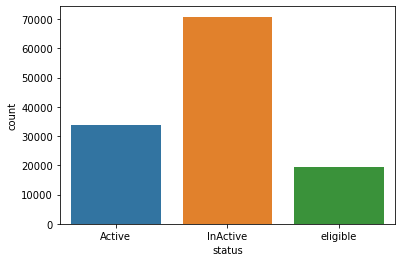

In [40]:
#1-D chart to check stutes columns 
sns.countplot(x=df.status, data=df ) ;
#plt.xticks(rotation=90)

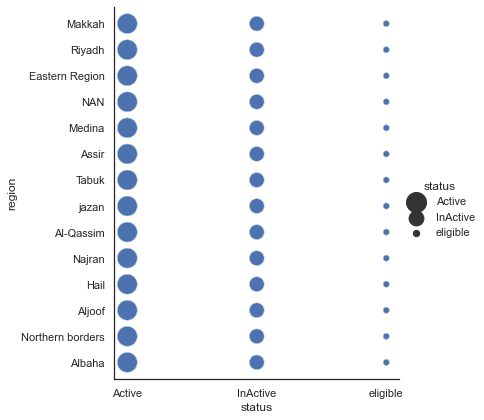

In [129]:
#2-D chart to check stutes columns with Regoin columns 
sns.set_theme(style="white")
sns.relplot(x=df.status, y=df.region,  palette="muted",
         height=6, data=df ,size="status",
            sizes=(40, 400), alpha=.5)

Step 4: Modelling

1- using Random Forest

In [51]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['serial-number', 'city', 'region','NAS','FirstFlightDate','LastFlightDate','RegistrationDate']
X = df[feature_cols] # Features
y = df.status # Target variable
                
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [68]:
from numpy import mean
from numpy import std

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.906 (0.026)


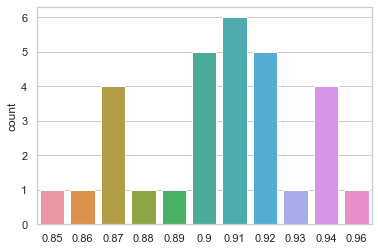

In [135]:
# Creating a bar plot
sns.set_theme(style="whitegrid")
ax=sns.countplot(x=n_scores, data=df);